In [35]:
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm

#from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import minmax_scale
#from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import RobustScaler
#from sklearn.preprocessing import Normalizer
#from sklearn.preprocessing import QuantileTransformer
#from c.preprocessing import PowerTransformer
# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.model_selection import train_test_split

from math import sqrt  # for root mean-squared error calculation

import seaborn as sns  # pretty plotting, including heat map


import os
from IPython.display import display

from sklearn import preprocessing


Check current dirctory

In [72]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True# initial work with the smaller data set


boston_input = pd.read_csv('boston.csv')

# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
print(boston_input.head())
print(boston_input.tail())

print('\ndataset dimensions', boston_input.shape)

# look at the list of column names, note that y is the response
list(boston_input.columns.values)

#bank.head()



boston DataFrame (first and last five rows):
  neighborhood     crim    zn  indus  chas    nox  rooms   age     dis  rad  \
0       Nahant  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1   Swampscott  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2   Swanpscott  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3   Marblehead  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4   Marblehead  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat    mv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  
    neighborhood     crim   zn  indus  chas    nox  rooms   age     dis  rad  \
501     Winthrop  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502     Winthrop  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503     Winthrop  0.06076  0.0  11.93     0  0.573  6

['neighborhood',
 'crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rooms',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'lstat',
 'mv']

# Basic descriptive statistics

In [73]:
# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)
#print('\nGeneral description of the boston DataFrame:')
#print(boston.info())

print('\nDescriptive statistics of the boston DataFrame:')
display(boston.describe())


Descriptive statistics of the boston DataFrame:


,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.528854
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.182176
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [74]:

# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)

# standard scores for the columns... along axis 0
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)


# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)


Data dimensions: (506, 13)
StandardScaler(copy=True, with_mean=True, with_std=True)
[2.25288538e+01 3.61352356e+00 1.13636364e+01 1.11367787e+01
 6.91699605e-02 5.54695059e-01 6.28463439e+00 6.85749012e+01
 3.79504269e+00 9.54940711e+00 4.08237154e+02 1.84555336e+01
 1.26530632e+01]
[9.17309810e+00 8.59304135e+00 2.32993957e+01 6.85357058e+00
 2.53742935e-01 1.15763115e-01 7.01922514e-01 2.81210326e+01
 2.10362836e+00 8.69865112e+00 1.68370495e+02 2.16280519e+00
 7.13400164e+00]

Dimensions for model_data: (506, 13)


In [75]:
#print(prelim_model_data[:,0])
#print(prelim_model_data[0,0])
#print(prelim_model_data[0,1])
#features= np.delete(prelim_model_data, 0, axis=1)
#print(features[0,0])
#print(features[:,0])
#print(boston['mv'])

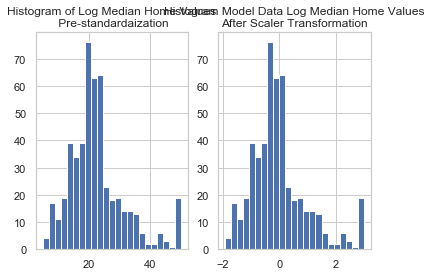

In [76]:
plt.subplot(1,2,1)
# histogram ofkind = 'hist', title ='Histogram Median Home Values' attributes in pandas DataFrame, object boston_input
plt.hist(prelim_model_data[:,0], bins = 'auto')
plt.title('Histogram of Log Median Home Values\n Pre-standardaization')
plt.savefig('Hist-Log-Median-Home-Values.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)


plt.subplot(1,2,2)
plt.hist(model_data[:,0], bins = 'auto')
plt.title('Histogram Model Data Log Median Home Values\nAfter Scaler Transformation')
plt.savefig('Hist-Model-Data-Log-Median-Home-Values-After-Scaler-Transformation.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None)
plt.show()

In [77]:
target = model_data[:,0]
#print(target)
print(model_data[0,0])
print(model_data[0,1])
#print(model_data[1,0])
data  = np.delete(model_data, 0, axis=1)
print(data[0,0])
print(data)


0.1603761596413756
-0.4197819386460083
-0.4197819386460083
[[-0.41978194  0.28482986 -1.2879095  ... -0.66660821 -1.45900038
  -1.0755623 ]
 [-0.41733926 -0.48772236 -0.59338101 ... -0.98732948 -0.30309415
  -0.49243937]
 [-0.41734159 -0.48772236 -0.59338101 ... -0.98732948 -0.30309415
  -1.2087274 ]
 ...
 [-0.41344658 -0.48772236  0.11573841 ... -0.80321172  1.17646583
  -0.98304761]
 [-0.40776407 -0.48772236  0.11573841 ... -0.80321172  1.17646583
  -0.86530163]
 [-0.41500016 -0.48772236  0.11573841 ... -0.80321172  1.17646583
  -0.66905833]]


Examine the structure of the DataFrame object

# Visualize dataset

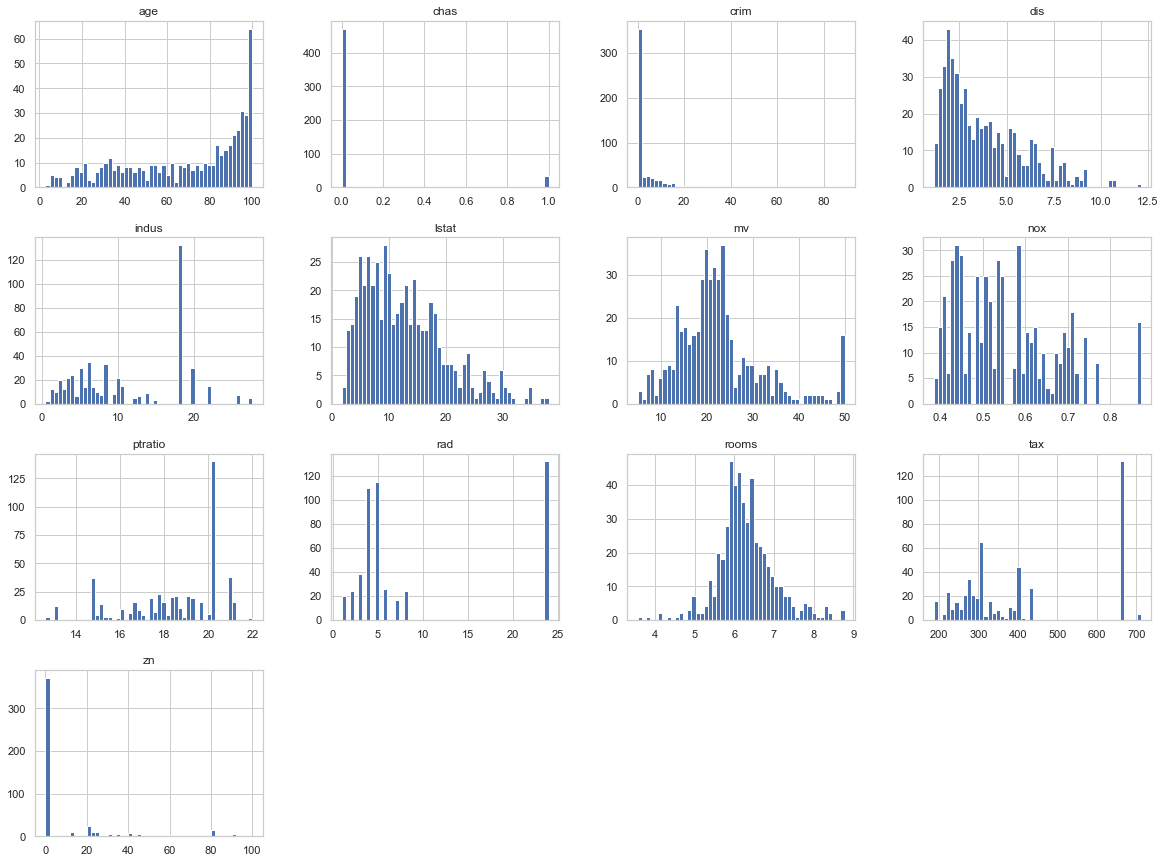

In [78]:
boston.hist( bins=50 , figsize=(20,15))
plt.show()

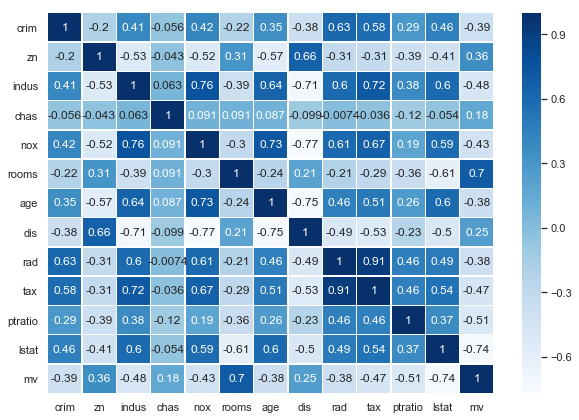

In [80]:
corr_matrix= boston.corr()
#display(corr_matrix["Default"].sort_values(ascending=False))

fig, ax = plt.subplots(figsize=(10,7)) # Sample figsize in inches

sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns, 
        annot=True, linewidths=.5, ax=ax ,  cmap="Blues")

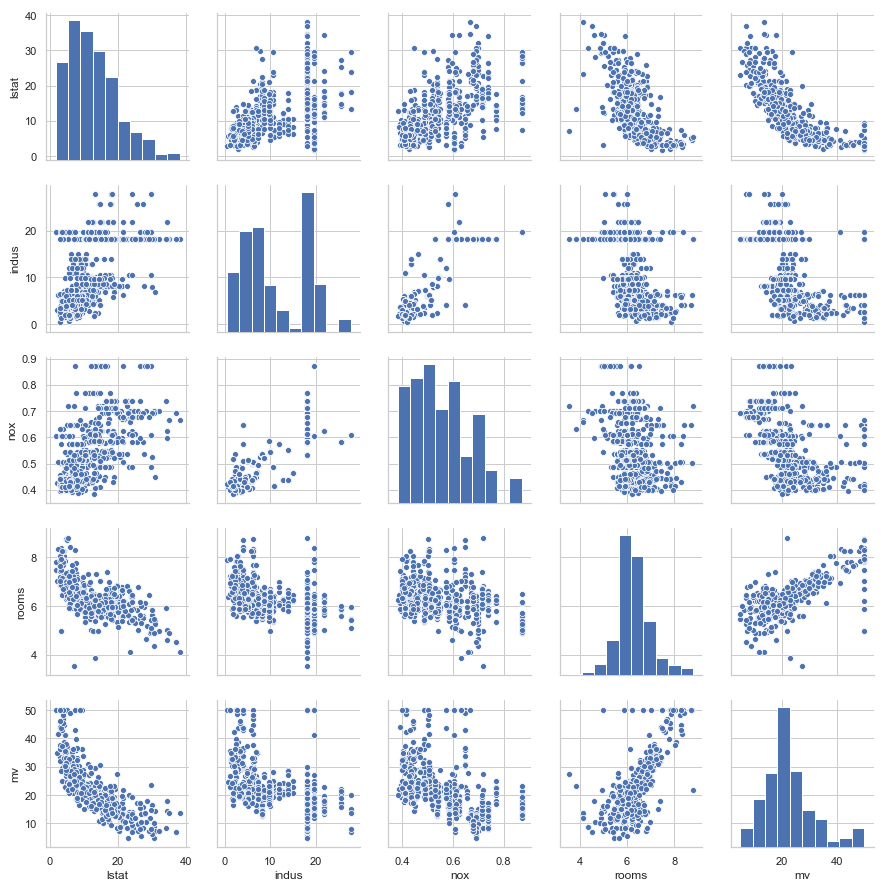

In [81]:
sns.set(style='whitegrid',context='notebook')
cols=['lstat','indus','nox','rooms','mv']
sns.pairplot(boston[cols],height=2.5)
plt.show()

# Transformation

In [17]:
names = ['Linear_Regression', 'Ridge_Regression', 'Lasso_Regression', 
          'ElasticNet_Regression'] 

regressors = [LinearRegression(fit_intercept = SET_FIT_INTERCEPT), 
              Ridge(alpha = 1, solver = 'cholesky', 
                    fit_intercept = SET_FIT_INTERCEPT, 
                    normalize = False, 
                    random_state = RANDOM_SEED),
              Lasso(alpha = 0.1, max_iter=10000, tol=0.01, 
                    fit_intercept = SET_FIT_INTERCEPT, 
                    random_state = RANDOM_SEED),
              ElasticNet(alpha = 0.1, l1_ratio = 0.5, 
                         max_iter=10000, tol=0.01, 
                         fit_intercept = SET_FIT_INTERCEPT, 
                         normalize = False, 
                         random_state = RANDOM_SEED)]


In [18]:
from sklearn.model_selection import KFold

# ten-fold cross-validation employed here
# As an alternative to 10-fold cross-validation, restdata with its 
# small sample size could be analyzed would be a good candidate
# for  leave-one-out cross-validation, which would set the number
# of folds to the number of observations in the data set.
N_FOLDS = 10

# set up numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)
# check the splitting process by looking at fold observation counts
index_for_fold = 0  # fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')
#   the structure of modeling data for this study has the
#   response variable coming first and explanatory variables later          
#   so 1:model_data.shape[1] slices for explanatory variables
#   and 0 is the index for the response variable    
    X_train = model_data[train_index, 1:model_data.shape[1]]
    X_test = model_data[test_index, 1:model_data.shape[1]]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]   
    print('\nShape of input data for this fold:',
          '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)

    index_for_method = 0  # initialize
    for name, reg_model in zip(names, regressors):
        print('\nRegression model evaluation for:', name)
        print('  Scikit Learn method:', reg_model)
        reg_model.fit(X_train, y_train)  # fit on the train set for this fold
        print('Fitted regression intercept:', reg_model.intercept_)
        print('Fitted regression coefficients:', reg_model.coef_)
 
        # evaluate on the test set for this fold
        y_test_predict = reg_model.predict(X_test)
        print('Coefficient of determination (R-squared):',
              r2_score(y_test, y_test_predict))
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))
        print(reg_model.get_params(deep=True))
        print('Root mean-squared error:', fold_method_result)
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
  
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names

print('\n----------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      'in standardized units (mean 0, standard deviation 1)\n',
      '\nMethod               Root mean-squared error', sep = '')     
print(cv_results_df.mean())   


Fold index: 0 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (455, 12)
X_test: (51, 12)
y_train: (455,)
y_test: (51,)

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Fitted regression intercept: -0.005032049293645764
Fitted regression coefficients: [-0.11088775  0.13573238  0.01408652  0.0787664  -0.23758124  0.26794267
  0.0065031  -0.37082275  0.27035218 -0.23150162 -0.21456859 -0.45500336]
Coefficient of determination (R-squared): 0.7650752349379009
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}
Root mean-squared error: 0.3080338355432656

Regression model evaluation for: Ridge_Regression
  Scikit Learn method: Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=1, solver='cholesky', tol=0.001)
Fitted regression interce

Fitted regression intercept: -0.03380366712089611
Fitted regression coefficients: [-0.          0.         -0.          0.         -0.02232652  0.49002976
 -0.         -0.         -0.         -0.12254191 -0.1655587  -0.2151978 ]
Coefficient of determination (R-squared): 0.012797921367182719
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 0.5, 'max_iter': 10000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': 1, 'selection': 'cyclic', 'tol': 0.01, 'warm_start': False}
Root mean-squared error: 1.3226217294160258

Fold index: 8 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (456, 12)
X_test: (50, 12)
y_train: (456,)
y_test: (50,)

Regression model evaluation for: Linear_Regression
  Scikit Learn method: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Fitted regression intercept: 0.03370025325331892
Fitted regression coefficien

RMS: 0.5622966754784585 


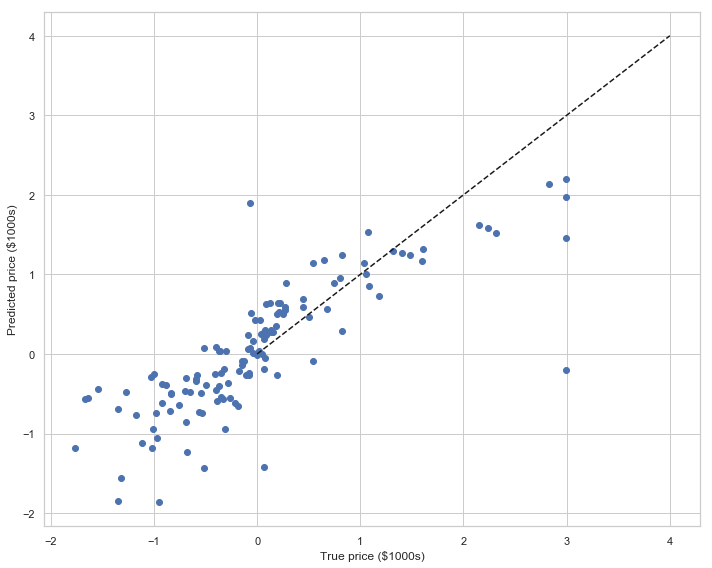

In [19]:
X_train, X_test, y_train, y_test = train_test_split(data, target)


clf = LinearRegression()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test

plt.figure(figsize=(10, 8))
plt.scatter(expected, predicted)
plt.plot([0, 4], [0, 4], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

print("RMS: %r " % np.sqrt(np.mean((predicted - expected) ** 2)))
print("AIC: %r " % 
plt.show()


RMS: 0.538247792425312 


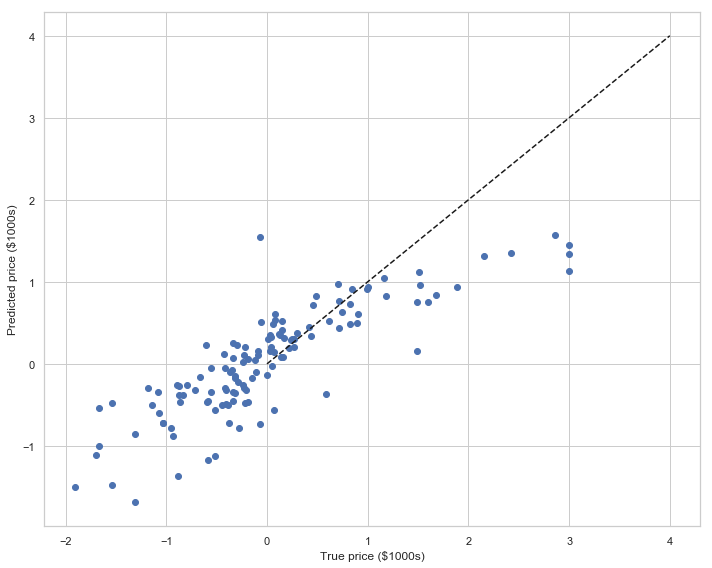

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data, target)
clf = Lasso(alpha = 0.1, max_iter=10000, tol=0.01, 
                    fit_intercept = SET_FIT_INTERCEPT, 
                    random_state = RANDOM_SEED)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test

plt.figure(figsize=(10, 8))
plt.scatter(expected, predicted)
plt.plot([0, 4], [0, 4], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

print("RMS: %r " % np.sqrt(np.mean((predicted - expected) ** 2)))

plt.show()

RMS: 0.5751715541039669 


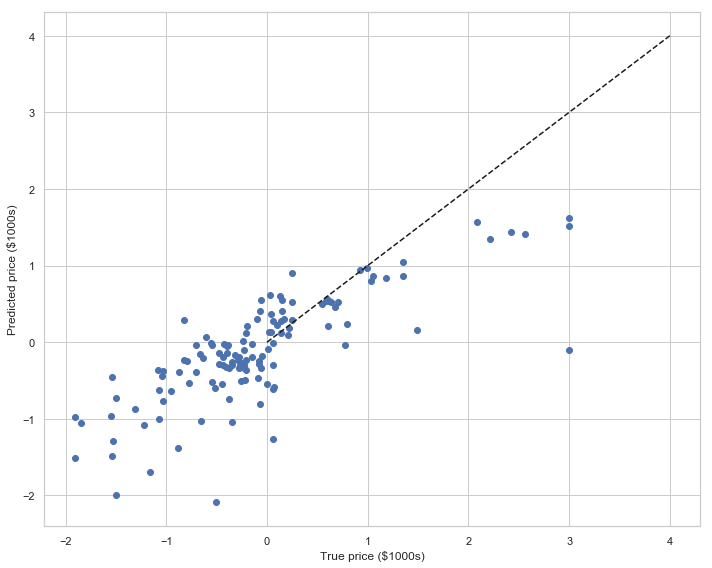

In [23]:
X_train, X_test, y_train, y_test = train_test_split(data, target)


ElasticNet(alpha = 0.1, l1_ratio = 0.5, 
                         max_iter=10000, tol=0.01, 
                         fit_intercept = SET_FIT_INTERCEPT, 
                         normalize = False, 
                         random_state = RANDOM_SEED)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
expected = y_test

plt.figure(figsize=(10, 8))
plt.scatter(expected, predicted)
plt.plot([0, 4], [0, 4], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

print("RMS: %r " % np.sqrt(np.mean((predicted - expected) ** 2)))

plt.show()


RMS: 0.368196461229181 


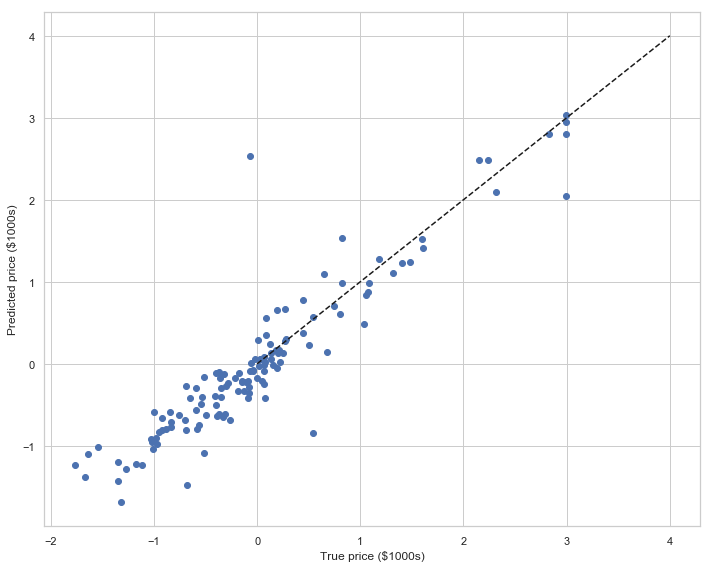

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
expected = y_test

plt.figure(figsize=(10, 8))
plt.scatter(expected, predicted)
plt.plot([0, 4], [0, 4], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()

print("RMS: %r " % np.sqrt(np.mean((predicted - expected) ** 2)))

plt.show()

In [83]:
X = model_data[:,0]
y = np.delete(model_data, 0, axis=1)

rng = np.random.RandomState(42)
X = np.c_[X, rng.randn(X.shape[0], 14)]  # add some bad features

# normalize data as done by Lars to allow for comparison
X /= np.sqrt(np.sum(X ** 2, axis=0))

In [84]:
print(__doc__)

# Author: Olivier Grisel, Gael Varoquaux, Alexandre Gramfort
# License: BSD 3 clause

import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn import datasets





# #############################################################################
# LassoLarsIC: least angle regression with BIC/AIC criterion

model_bic = LassoLarsIC(criterion='bic')
t1 = time.time()
model_bic.fit(X, Y)
t_bic = time.time() - t1
alpha_bic_ = model_bic.alpha_

model_aic = LassoLarsIC(criterion='aic')
model_aic.fit(X, y)
alpha_aic_ = model_aic.alpha_


def plot_ic_criterion(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion_ = model.criterion_
    plt.plot(-np.log10(alphas_), criterion_, '--', color=color,
             linewidth=3, label='%s criterion' % name)
    plt.axvline(-np.log10(alpha_), color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')
plot_ic_criterion(model_bic, 'BIC', 'r')
plt.legend()
plt.title('Information-criterion for model selection (training time %.3fs)'
          % t_bic)

# #############################################################################
# LassoCV: coordinate descent

# Compute paths
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
model = LassoCV(cv=20).fit(X, y)
t_lasso_cv = time.time() - t1

# Display results
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)

# #############################################################################
# LassoLarsCV: least angle regression

# Compute paths
print("Computing regularization path using the Lars lasso...")
t1 = time.time()
model = LassoLarsCV(cv=20).fit(X, y)
t_lasso_lars_cv = time.time() - t1

# Display results
m_log_alphas = -np.log10(model.cv_alphas_)

plt.figure()
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: Lars (train time: %.2fs)'
          % t_lasso_lars_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)

plt.show()

Automatically created module for IPython interactive environment


NameError: name 'Y' is not defined

In [1]:
# Import supplementary visualizations code visuals.py
import visuals as vs

# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(data, target)

NameError: name 'data' is not defined

In [32]:
features =prelim_model_data[:,-0]
features
#boston_input.head()

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 22.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.2, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

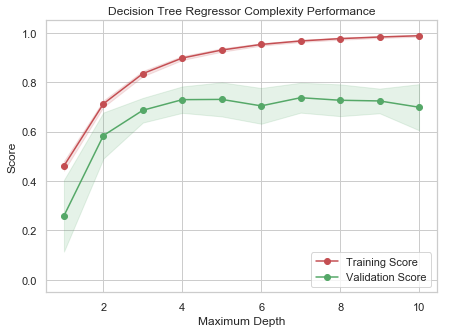

In [12]:
vs.ModelComplexity(X_train, y_train)

In [ ]:
# TODO: Create a decision tree regressor object
regressor = DecisionTreeRegressor()